# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

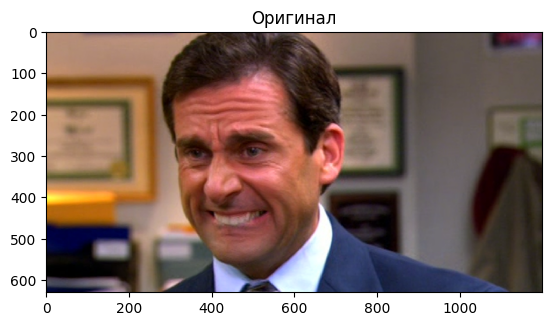

Оригинальный размер: 684905 байт


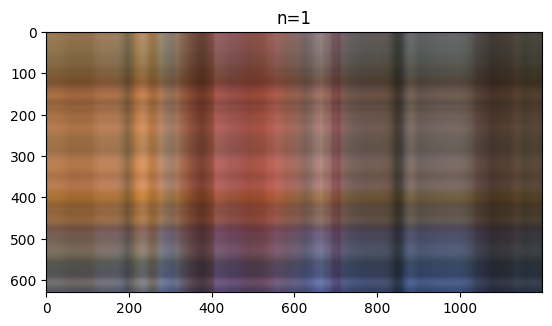

Размер после сжатия n=1: 381188 байт


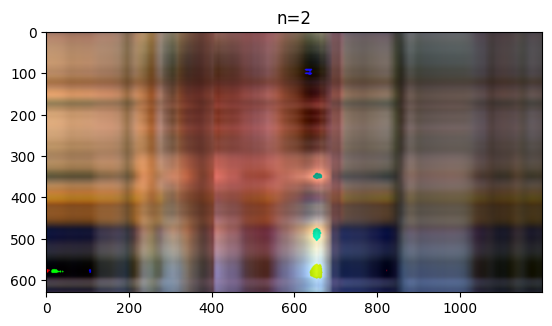

Размер после сжатия n=2: 426133 байт


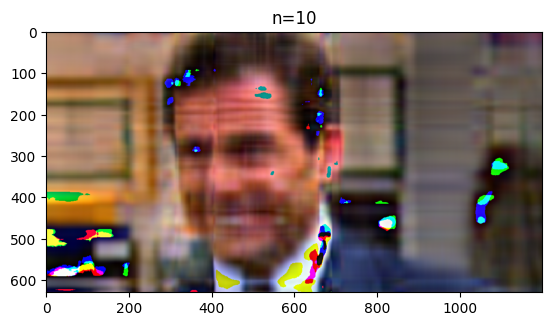

Размер после сжатия n=10: 551966 байт


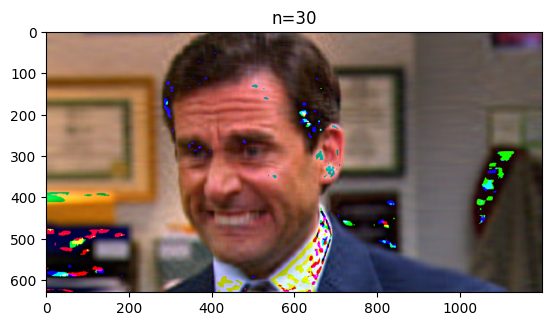

Размер после сжатия n=30: 607060 байт


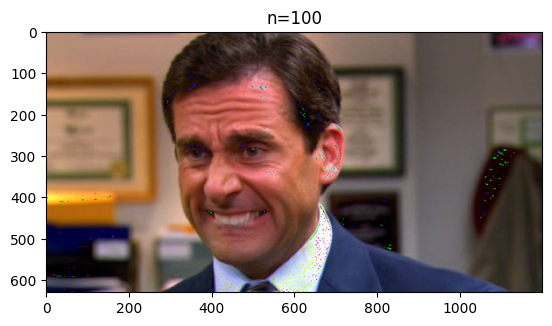

Размер после сжатия n=100: 663277 байт


In [28]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

img = Image.open('Cringe.png')
RGB = img.split()

NoSVD = Image.merge('RGB', (RGB[0], RGB[1], RGB[2]))

plt.imshow(NoSVD)
plt.title('Оригинал')
plt.show()

NoSVD.save(f'NoSVD.png')
print('Оригинальный размер: ' + str(os.path.getsize('NoSVD.png')) + ' байт')

def SVD(n): # разложение SVD
    rU, rS, rV = np.linalg.svd(RGB[0], full_matrices=False)
    gU, gS, gV = np.linalg.svd(RGB[1], full_matrices=False)
    bU, bS, bV = np.linalg.svd(RGB[2], full_matrices=False)

    R = np.matrix(rU[:, :n]) * np.diag(rS[:n]) * np.matrix(rV[:n, :])
    G = np.matrix(gU[:, :n]) * np.diag(gS[:n]) * np.matrix(gV[:n, :])
    B = np.matrix(bU[:, :n]) * np.diag(bS[:n]) * np.matrix(bV[:n, :])

    R = Image.fromarray(np.asarray(R, dtype=np.uint8))
    G = Image.fromarray(np.asarray(G, dtype=np.uint8))
    B = Image.fromarray(np.asarray(B, dtype=np.uint8))
    SVDImg = Image.merge('RGB', (R, G, B))

    plt.imshow(SVDImg)
    plt.title('n=' + str(n))
    plt.show()

    SVDImg.save(f'SVD.png')
    print('Размер после сжатия n=' + str(n) + ': ' + str(os.path.getsize('SVD.png')) + ' байт')

SVD(1)
SVD(2)
SVD(10)
SVD(30)
SVD(100)

## Источник
https://dmicz.github.io/machine-learning/svd-image-compression/